In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
from sklearn.cluster import KMeans 

import sklearn.metrics as sm
from fcmeans import FCM
import seaborn as sns
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline 

In [2]:
#Load Data 
df = pd.read_csv("Mall_Customers.csv")

In [3]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
print(df.shape)

(200, 5)


In [5]:
df.info

<bound method DataFrame.info of      CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0             1    Male   19                  15                      39
1             2    Male   21                  15                      81
2             3  Female   20                  16                       6
3             4  Female   23                  16                      77
4             5  Female   31                  17                      40
..          ...     ...  ...                 ...                     ...
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83

[200 rows x 5 columns]>

In [6]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [7]:
df1 = df[["Annual Income (k$)","Spending Score (1-100)"]]
df1.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [8]:
x=df1
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


Text(0.5, 1.0, 'Spending Score vs Age')

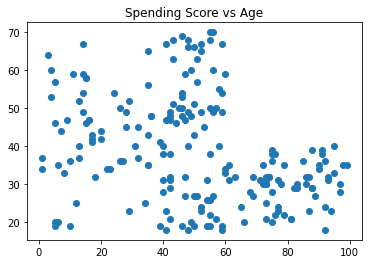

In [9]:
plt.scatter(x = df["Spending Score (1-100)"], y = df['Age'])
plt.title('Spending Score vs Age')

Text(0.5, 1.0, 'Spending Score vs Income')

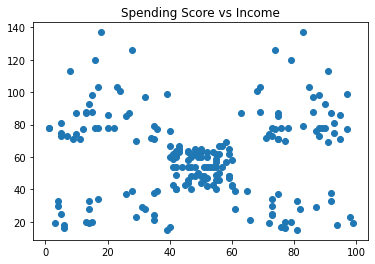

In [10]:
plt.scatter(x = df["Spending Score (1-100)"], y = df['Annual Income (k$)'])
plt.title('Spending Score vs Income')

Text(0.5, 1.0, 'Age vs Income')

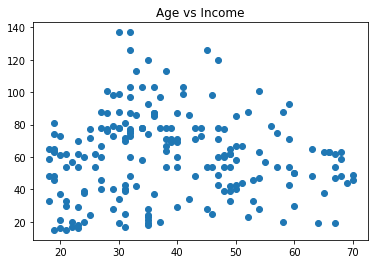

In [11]:
#plt.figure(figsize(10,12))
plt.scatter(x = df["Age"], y = df['Annual Income (k$)'])
plt.title('Age vs Income')

# KMeans 

In [12]:
model = KMeans(n_clusters = 2)
y_kmeans = model.fit_predict(x)
y_kmeans

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

In [13]:
#Predict Centroids 

print(model.cluster_centers_)

[[37.28888889 50.28888889]
 [79.6        50.12727273]]


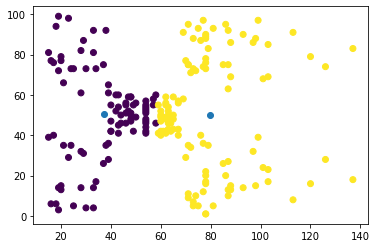

In [14]:
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"], c = y_kmeans)
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1])


In [15]:
#Elbow Method 

sse = []
for k in range(3, 8):
    km = KMeans(n_clusters=k)
    km.fit(x)
    sse.append(km.inertia_)

Text(0, 0.5, 'SSE')

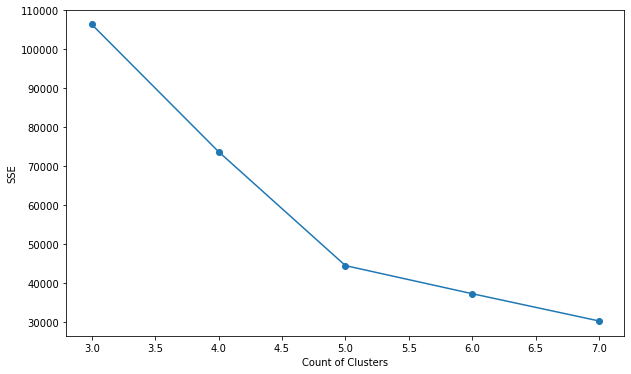

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(range(3, 8), sse, '-o')
plt.xlabel('Count of Clusters')
plt.ylabel('SSE')

In [37]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [36]:
range_n_clusters = [1,2,3,4,5,6,7,8,9,10]
silhouette_avg=[]

for num_clusters in range_n_clusters:
    #initialize kmeans 
    kmeans=KMeans(n_clusters=num_clusters)
    kmeans.fit(x)
    cluster_labels=kmeans.labels_
    
    #silhouette score 
    silhouette_avg.append(silhouette_score(df, cluster_labels))
    
plt.plot(range_n_clusters, silhouette_avg, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silouette analysis for optimal k')
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'

In [17]:
model = KMeans(n_clusters=5)

#Using Elbow Method 

In [18]:
y_kmeans = model.fit_predict(x)
print(y_kmeans)

[0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0 4 0
 4 0 4 0 4 0 3 0 4 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 1 2 1 3 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]


In [19]:
print(model.cluster_centers_)


[[26.30434783 20.91304348]
 [86.53846154 82.12820513]
 [88.2        17.11428571]
 [55.2962963  49.51851852]
 [25.72727273 79.36363636]]


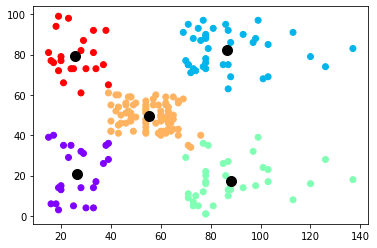

In [20]:
plt.scatter(x['Annual Income (k$)'],x["Spending Score (1-100)"], c = y_kmeans, cmap = 'rainbow')
plt.scatter(model.cluster_centers_[:,0],model.cluster_centers_[:,1],s = 100,c = "black",label = "Centroids")


# Fuzzy - C- Means 

In [21]:
#Load & Train Model

fcm = FCM(n_clusters=5)
fcm.fit(x.values)

In [22]:
#Make Prediction 

#Outputs
fcm_centers = fcm.centers
fcm_labels = fcm.predict(x.values)

In [23]:
#Final Centroids and Labels 

fcm_centers = pd.DataFrame(fcm_centers)
fcm_centers

,0,1
0,26.454066,77.873856
1,86.129413,16.745679
2,56.250491,49.580192
3,84.414169,82.770885
4,27.053804,18.587923


In [24]:
fcm_labels

array([4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0,
       4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 2,
       4, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 1, 3, 2, 3, 1, 3, 1, 3,
       2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 2, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int64)

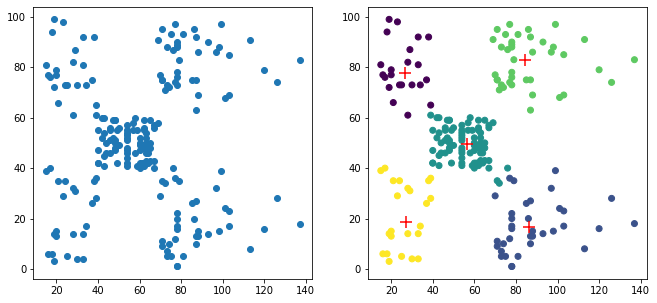

In [25]:
#Visualize Results 

#plot result 

f, axes = plt.subplots(1,2, figsize=(11,5))
axes[0].scatter(list(x.iloc[:,0]), list(x.iloc[:,1]))
axes[1].scatter(list(x.iloc[:,0]), list(x.iloc[:,1]), c=fcm_labels)
axes[1].scatter(list(fcm_centers.iloc[:,0]), list(fcm_centers.iloc[:,1]), marker="+", s=150, c='r')
plt.show()

# Hierarchical Clustering

In [26]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [27]:
x = df.iloc[:, [3, 4]].values  

In [28]:
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

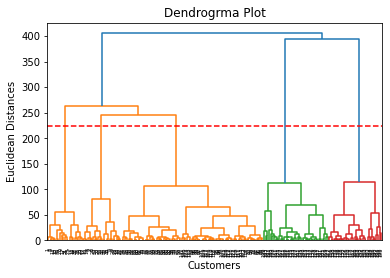

In [29]:
#Finding the optimal number of clusters using the dendrogram  
 
dendro = shc.dendrogram(shc.linkage(x, method="ward"))   
plt.title("Dendrogrma Plot")  
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")
plt.axhline(y=225, color='r', linestyle="--")
plt.show()  

In [30]:
#training the hierarchical model on dataset  
  
hc= AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')  
y_pred= hc.fit_predict(x)  

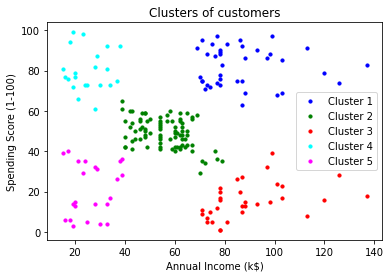

In [31]:
#visulaizing the clusters  
plt.scatter(x[y_pred == 0, 0], x[y_pred == 0, 1], s = 10, c = 'blue', label = 'Cluster 1')  
plt.scatter(x[y_pred == 1, 0], x[y_pred == 1, 1], s = 10, c = 'green', label = 'Cluster 2')  
plt.scatter(x[y_pred == 2, 0], x[y_pred == 2, 1], s = 10, c = 'red', label = 'Cluster 3')  
plt.scatter(x[y_pred == 3, 0], x[y_pred == 3, 1], s = 10, c = 'cyan', label = 'Cluster 4')  
plt.scatter(x[y_pred == 4, 0], x[y_pred == 4, 1], s = 10, c = 'magenta', label = 'Cluster 5')  
plt.title('Clusters of customers')  
plt.xlabel('Annual Income (k$)')  
plt.ylabel('Spending Score (1-100)')  
plt.legend()  
plt.show()  